Importujemy biblioteki

In [0]:
# TensorFlow и tf.keras
import tensorflow as tf 
from tensorflow import keras
#Biblioteki wspierające
import numpy as np
import matplotlib.pyplot as plt

Przygotowanie danych:
Pobieramy zestaw danych Fashion MNIST.
Ładowanie danych zwraca cztery tablice NumPy:
Train_image i train_labels - dane treningowe
Test_image i test_labels - dane testowe

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_image, train_labels), (test_image, test_labels) = fashion_mnist.load_data()

Nazwiemy klasy wedlug dokumentacji

In [0]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Jeśli spojrzysz na pierwszy obraz w zestawie treningowym, zobaczysz, że wartości pikseli mieszczą się w zakresie od 0 do 255

<function matplotlib.pyplot.show>

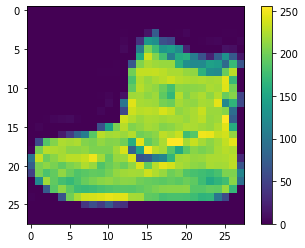

In [12]:
plt.figure
plt.imshow(train_image[0])
plt.colorbar()
plt.grid(False)
plt.show

Skalujemy te wartości do zakresu od 0 do 1,Aby to zrobić, dzielimy wartości przez 255. 
Ważne jest, aby zestaw treningowy i zestaw testowy były wstępnie przetwarzane w ten sam sposób.

In [0]:
train_image = train_image / 255.0
test_image = test_image / 255.0

Wyświetlimy pierwsze 25 obrazów z zestawu treningowego, a poniżej wyświetlimy nazwy ich klas.

<function matplotlib.pyplot.show>

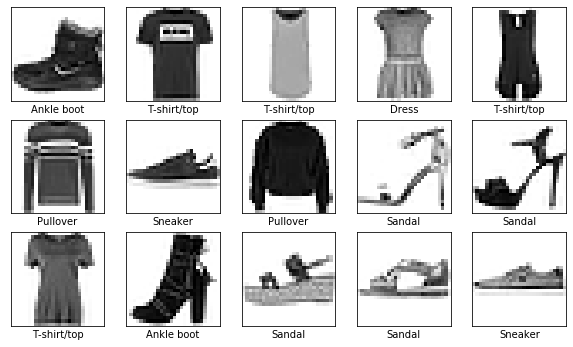

In [14]:
plt.figure(figsize = (10,10))
for i in range(15):
    plt.subplot(5,5,1+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show

Zbudujemy model:
Podstawowym elementem składowym sieci neuronowej jest warstwa. Warstwy wyodrębniają obrazy z dostarczonych im danych.

Większość głębokiego uczenia się polega na łączeniu w sekwencję prostych warstw. Większość warstw, takich jak tf.keras.layers.Dense, ma opcje ustawione podczas treningu.

Pierwsza warstwa tej sieci - tf.keras.layers.Flatten, konwertuje format obrazu z dwuwymiarowej tablicy (28 na 28 pikseli) na jednowymiarową (wymiar 28 * 28 = 784 pikseli). Warstwa wyodrębnia rzędy pikseli z obrazu i układa je w jednym rzędzie. Ta warstwa nie ma parametrów do treningu; formatuje tylko dane.

Po rozkładzie pikseli sieć neuronowa zawiera dwie warstwy tf.keras.layers.Dense. Są to w pełni połączone warstwy neuronowe. Pierwsza gęsta warstwa składa się ze 128 węzłów (lub neuronów). Druga (i ostatnia) 10-węzłowa warstwa softmax zwraca tablicę 10 oszacowań prawdopodobieństwa, co daje w sumie 1. Każdy węzeł zawiera oszacowanie wskazujące prawdopodobieństwo, że obraz należy do jednej z 10 klas.

In [0]:
Model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

Zanim model będzie gotowy do treningu, musimy podać kilka dodatkowych parametrów. Są one dodawane w kroku modelu kompilacji:
    Funkcja utraty(loss) - mierzy dokładność modelu podczas treningu. Chcemy zminimalizować tę funkcję, aby „skierować” model we właściwym kierunku.
    Optymalizator (Optimizer) - pokazuje przy pomocy jakiego algorytmu model jest aktualizowany na podstawie danych wejściowych i funkcji utraty.
    Metryki(metrics) - używane do monitorowania treningu i testowania modeli. W naszym przykładzie użyto metryki dokładności równej proporcji poprawnie sklasyfikowanych zdjęć.

In [0]:
Algorithms = np.array(['SGD','adadelta','adagrad','adam','rmsprop'])
Answers = np.empty([3,5])
Model.compile (optimizer = 'SGD',
               loss = tf.keras.losses.SparseCategoricalCrossentropy (from_logits = True),
               metrics = ['accuracy'])

Uczenie modeli

In [17]:
k = 0;
for i in Algorithms:
    for j in range(3):
        print(i, j)
        Model.fit(train_image,train_labels,epochs = 10)
        test_lost, test_acc = Model.evaluate(test_image, test_labels, verbose = 2)
        
        Answers[j][k] = test_acc;
        print('Accuracy:', test_acc)
        Model = keras.Sequential([
            keras.layers.Flatten(input_shape = (28, 28)),
            keras.layers.Dense(128, activation = 'relu'),
            keras.layers.Dense(10, activation = 'softmax')
        ])
        Model.compile (optimizer = i,
            loss = tf.keras.losses.SparseCategoricalCrossentropy (from_logits = True),
             metrics = ['accuracy'])
    k+=1

SGD 0
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 72us/sample - loss: 2.0054 - acc: 0.4927
Epoch 2/10
60000/60000 [==============================] - 4s 65us/sample - loss: 1.8329 - acc: 0.6751
Epoch 3/10
60000/60000 [==============================] - 4s 65us/sample - loss: 1.7853 - acc: 0.7091
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 1.7666 - acc: 0.7200
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 1.7561 - acc: 0.7254
Epoch 6/10
60000/60000 [==============================] - 4s 65us/sample - loss: 1.7495 - acc: 0.7292
Epoch 7/10
60000/60000 [==============================] - 4s 65us/sample - loss: 1.7448 - acc: 0.7312
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 1.7412 - acc: 0.7334
Epoch 9/10
60000/60000 [==============================] - 4s 66us/sample - loss: 1.7383 - acc: 0.7347
Epoch 10/10
60000/60000 [============================

Wyświetlimy wyniki na ekranie, wskazując liczbę znaków po przecinku

In [18]:
for i in range(5):
  print(Algorithms[i], np.around(Answers[:,i],3))

SGD [0.734 0.731 0.731]
adadelta [0.72  0.652 0.514]
adagrad [0.646 0.794 0.795]
adam [0.795 0.872 0.865]
rmsprop [0.864 0.865 0.86 ]
